In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy import constants as c 
from astropy import units as u
from scipy.optimize import curve_fit

In [185]:
52/4

13.0

In [189]:
data32  = np.load('Results/list_32_gp_l7_1e9.npy')
data21  = np.load('Results/list_21_gp_l7_1e9.npy')
data32_p9  = np.load('Results/list_32_p9_l7_1e9.npy')
data21_p9  = np.load('Results/list_21_p9_l7_1e9.npy')

data32_1e7  = np.load('Results/phi_lists_1e7/phi_list_32.npy')
data21_1e7  = np.load('Results/phi_lists_1e7/phi_list_21.npy')
data32_p9_1e7  = np.load('Results/phi_lists_1e7/phi_list_32_p9.npy')
data21_p9_1e7  = np.load('Results/phi_lists_1e7/phi_list_21_p9.npy')


data32_obs = np.load('Results/phi_lists_1e7/phi_list_32_obs.npy')
data21_obs = np.load('Results/phi_lists_1e7/phi_list_21_obs.npy')
data32_obs_p9 = np.load('Results/phi_lists_1e7/phi_list_32_obs_p9.npy')
data21_obs_p9 = np.load('Results/phi_lists_1e7/phi_list_21_obs_p9.npy')

temp = []
for i in range(1,72):
    temp.append(np.load(f'Results/MPC_21_4e9_0opps/phi_list/phi_list_21_{i}.npy'))
data_21_obs_4e9 = np.concatenate(tuple(temp))

temp = []
for i in range(1,72):
    temp.append(np.load(f'Results/MPC_32_4e9_0opps/phi_list/phi_list_32_{i}.npy'))
data_32_obs_4e9 = np.concatenate(tuple(temp))

temp = []
for i in range(1,72):
    temp.append(np.load(f'L7_32_4E9/phi_list_32_{i}.npy'))
data32_4e9 = np.concatenate(tuple(temp))

temp = []
for i in range(1,72):
    temp.append(np.load(f'L7_21_4E9/phi_list_21_{i}.npy'))
data21_4e9 = np.concatenate(tuple(temp))


time    = np.linspace(0,1e7,10000)

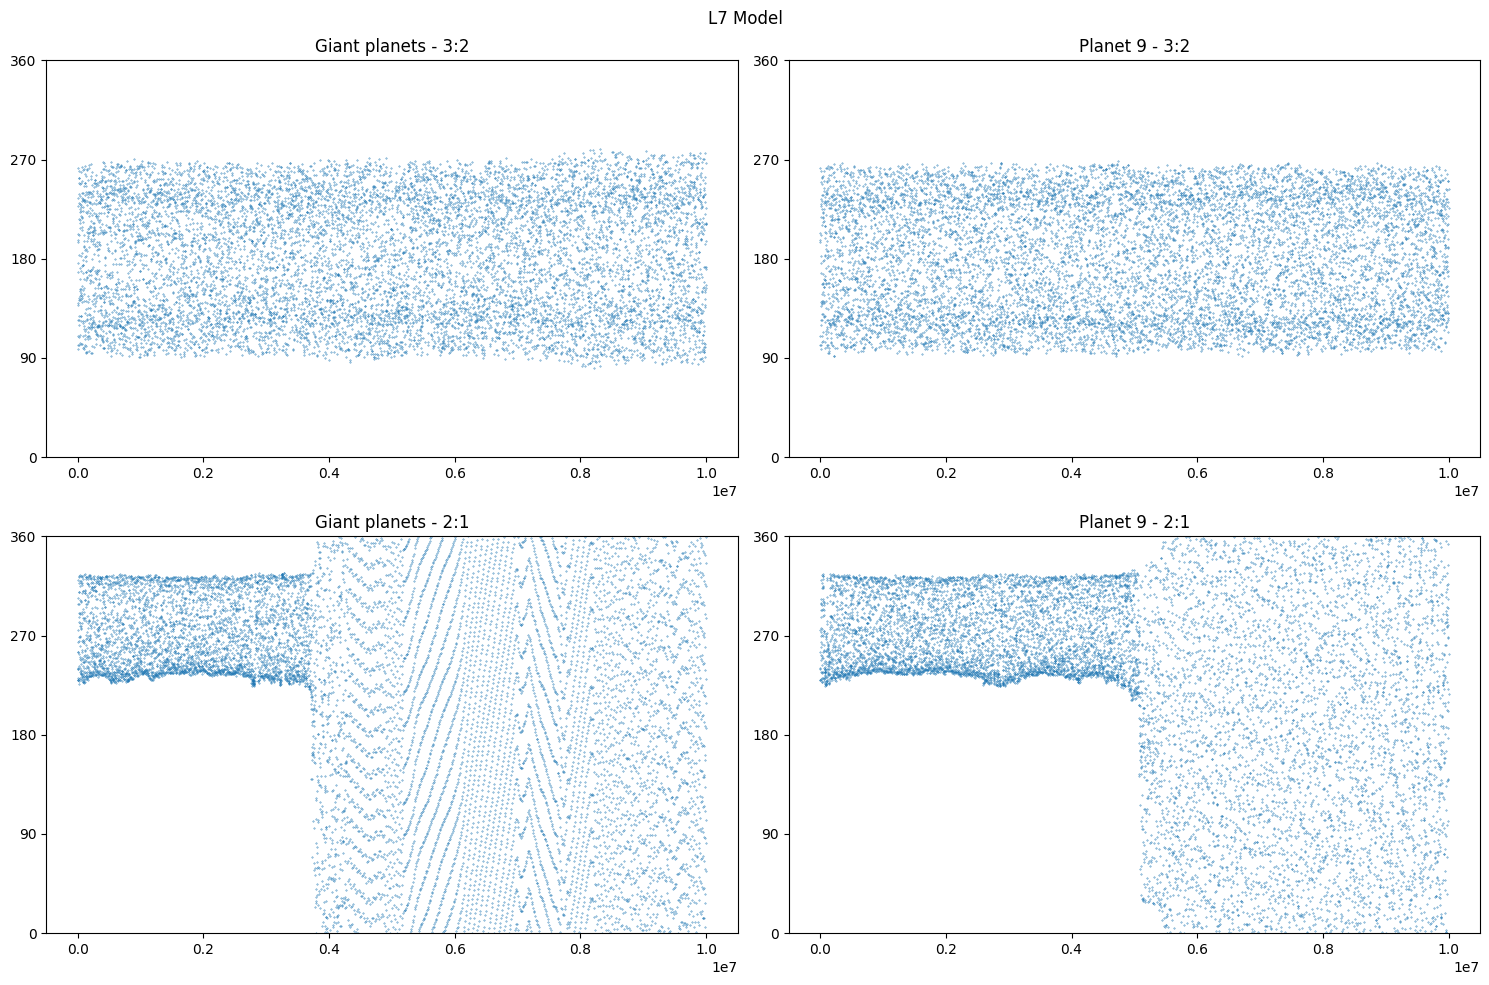

In [190]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
time    = np.linspace(0,1e7,10000)
obj = 0
ax[0][0].scatter(time,data32[obj],s=0.1)
ax[0][0].set_title('Giant planets - 3:2')
ax[0][1].scatter(time,data32_p9[obj],s=0.1)
ax[0][1].set_title('Planet 9 - 3:2')

ax[1][0].scatter(time,data21[obj],s=0.1)
ax[1][0].set_title('Giant planets - 2:1')
ax[1][1].scatter(time,data21_p9[obj],s=0.1)
ax[1][1].set_title('Planet 9 - 2:1')
for axi in [ax[0][0],ax[0][1],ax[1][0],ax[1][1]]:
    axi.set_ylim(0,360)
    axi.set_yticks([0,90,180,270,360]);
fig.suptitle('L7 Model')
fig.tight_layout()

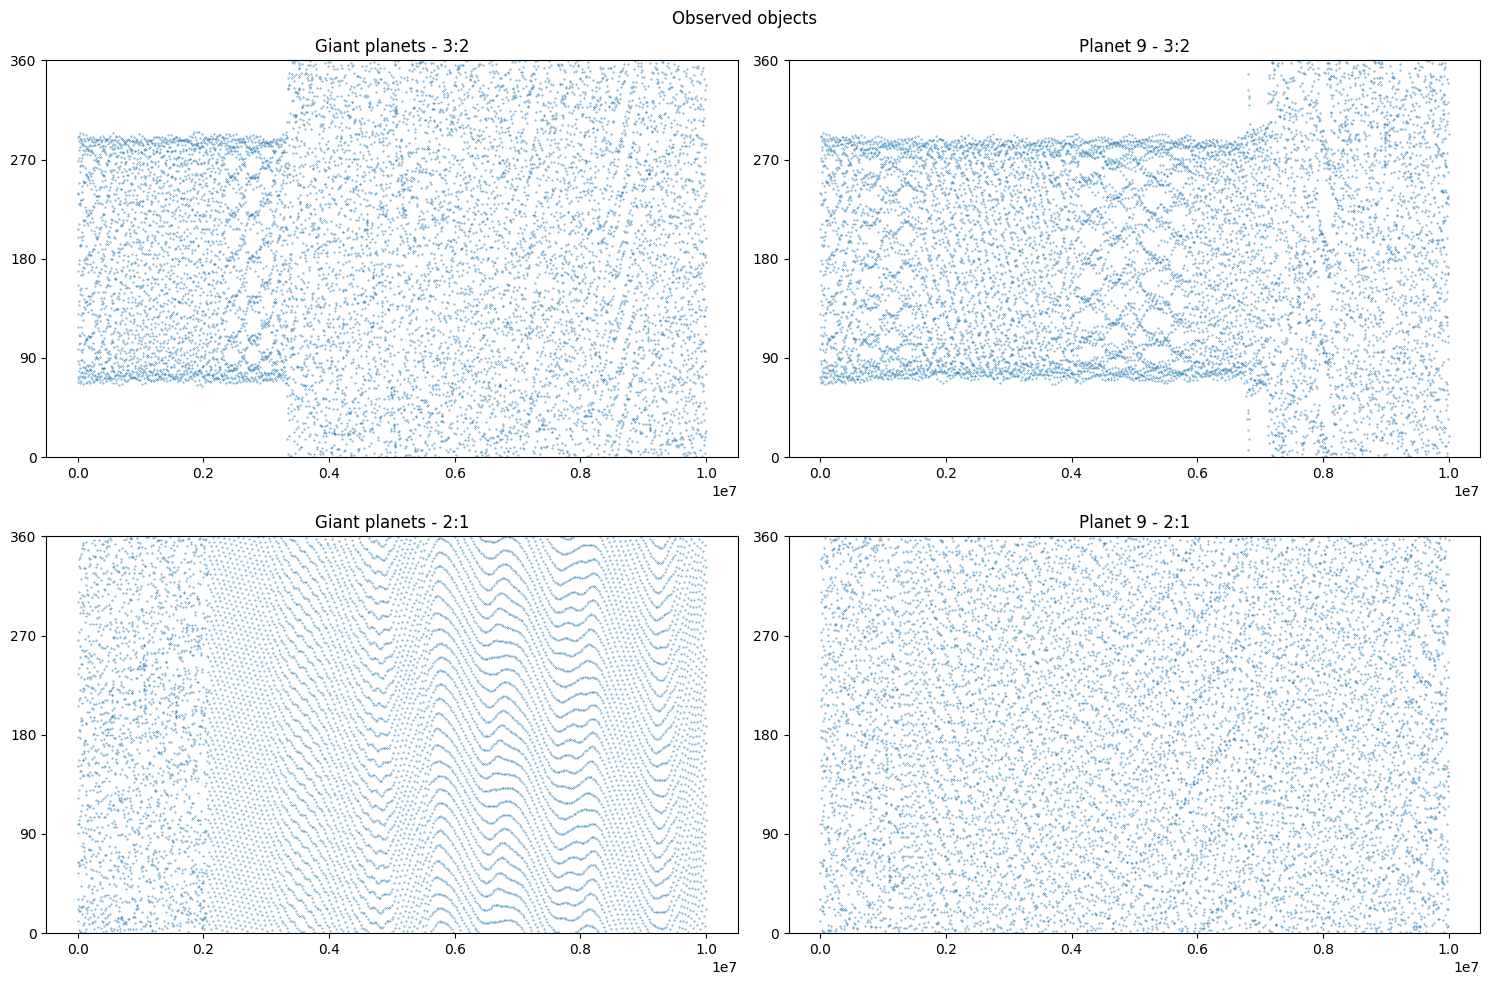

In [191]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
time    = np.linspace(0,1e7,10000)
obj = 0
ax[0][0].scatter(time,data32_obs[obj],s=0.1)
ax[0][0].set_title('Giant planets - 3:2')
ax[0][1].scatter(time,data32_obs_p9[obj],s=0.1)
ax[0][1].set_title('Planet 9 - 3:2')

ax[1][0].scatter(time,data21_obs[obj],s=0.1)
ax[1][0].set_title('Giant planets - 2:1')
ax[1][1].scatter(time,data21_obs_p9[obj],s=0.1)
ax[1][1].set_title('Planet 9 - 2:1')
for axi in [ax[0][0],ax[0][1],ax[1][0],ax[1][1]]:
    axi.set_ylim(0,360)
    axi.set_yticks([0,90,180,270,360]);
fig.suptitle('Observed objects')
fig.tight_layout()

In [192]:
def int_med(ydata,n):
    med_list = []
    for i in range(n):
        segment_length = int(10000/n)
        med_list.append(np.median(ydata[i*segment_length:(i+1)*segment_length]))
    return med_list
def medians_std(data):
    medians = [int_med(obj,10) for obj in data]
    med_std = [np.std(median) for median in medians]
    return np.array(med_std)

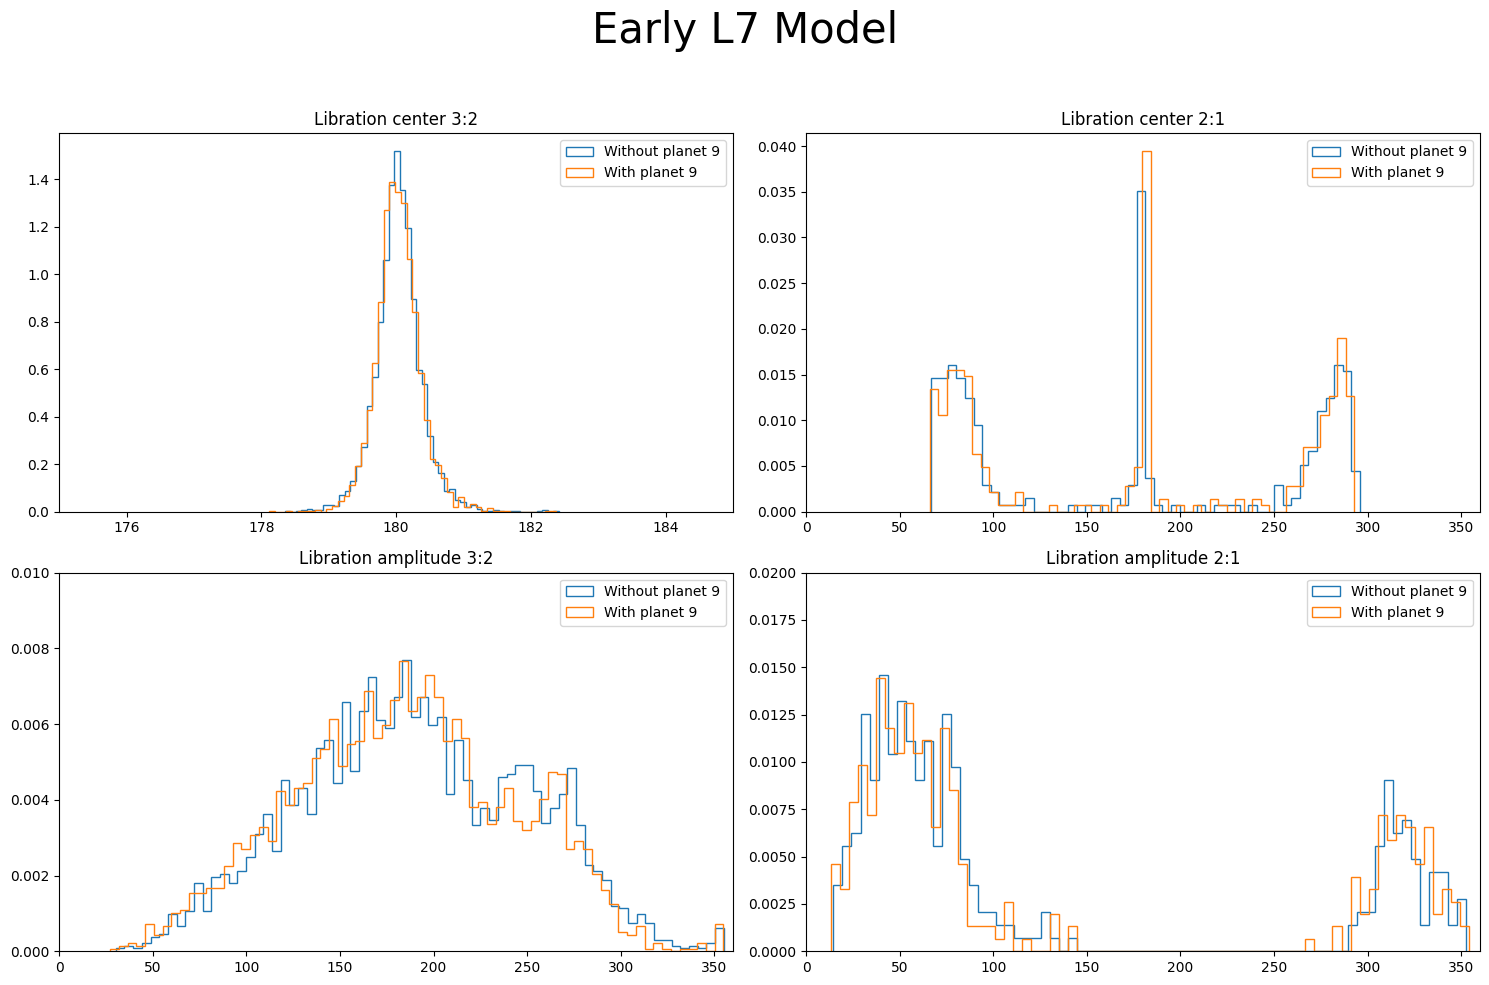

In [197]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

lib_center_32      = np.array([np.median(phi) for phi in data32_1e7])
lib_center_21      = np.array([np.median(phi) for phi in data21_1e7])
lib_center_32_p9   = np.array([np.median(phi) for phi in data32_p9_1e7])
lib_center_21_p9   = np.array([np.median(phi) for phi in data21_p9_1e7])

lib_amp_32      = np.array([np.max(phi)-np.min(phi) for phi in data32_1e7])
lib_amp_21      = np.array([np.max(phi)-np.min(phi) for phi in data21_1e7])
lib_amp_32_p9   = np.array([np.max(phi)-np.min(phi) for phi in data32_p9_1e7])
lib_amp_21_p9   = np.array([np.max(phi)-np.min(phi) for phi in data21_p9_1e7])

mask32     = (lib_amp_32     < 355) & (medians_std(data32) < 10)
mask21     = (lib_amp_21     < 355) & (medians_std(data21) < 10)
mask32_p9  = (lib_amp_32_p9  < 355) & (medians_std(data32_p9) < 10)
mask21_p9  = (lib_amp_21_p9  < 355) & (medians_std(data21_p9) < 10)

# Libration center plots
ax[0][0].hist(lib_center_32[mask32] ,bins=50,histtype='step'   , label='Without planet 9',density=True);
ax[0][1].hist(lib_center_21[mask21] ,bins=50,histtype='step'   , label='Without planet 9',density=True);

ax[0][0].hist(lib_center_32_p9[mask32_p9] ,bins=50,histtype='step', label='With planet 9',density=True);
ax[0][1].hist(lib_center_21_p9[mask21_p9] ,bins=50,histtype='step', label='With planet 9',density=True);

ax[0][0].legend()
ax[0][1].legend()
ax[0][0].set_title('Libration center 3:2')
ax[0][1].set_title('Libration center 2:1')

# Libration amplitude plots
ax[1][0].hist(lib_amp_32[mask32] ,bins=70,histtype='step'   ,label='Without planet 9',density=True)
ax[1][1].hist(lib_amp_21[mask21] ,bins=70,histtype='step'   ,label='Without planet 9',density=True)

ax[1][0].hist(lib_amp_32_p9[mask32_p9] ,bins=70,histtype='step',label='With planet 9',density=True)
ax[1][1].hist(lib_amp_21_p9[mask21_p9] ,bins=70,histtype='step',label='With planet 9',density=True)

ax[1][0].legend()
ax[1][1].legend()
ax[1][0].set_ylim(0,0.01)
ax[1][1].set_ylim(0,0.02)
ax[1][0].set_title('Libration amplitude 3:2')
ax[1][1].set_title('Libration amplitude 2:1')

ax[0][0].set_xlim(175,185)
ax[0][1].set_xlim(0,360)
ax[1][0].set_xlim(0,360)
ax[1][1].set_xlim(0,360)

fig.suptitle('Early L7 Model\n',fontsize=30)
fig.tight_layout()

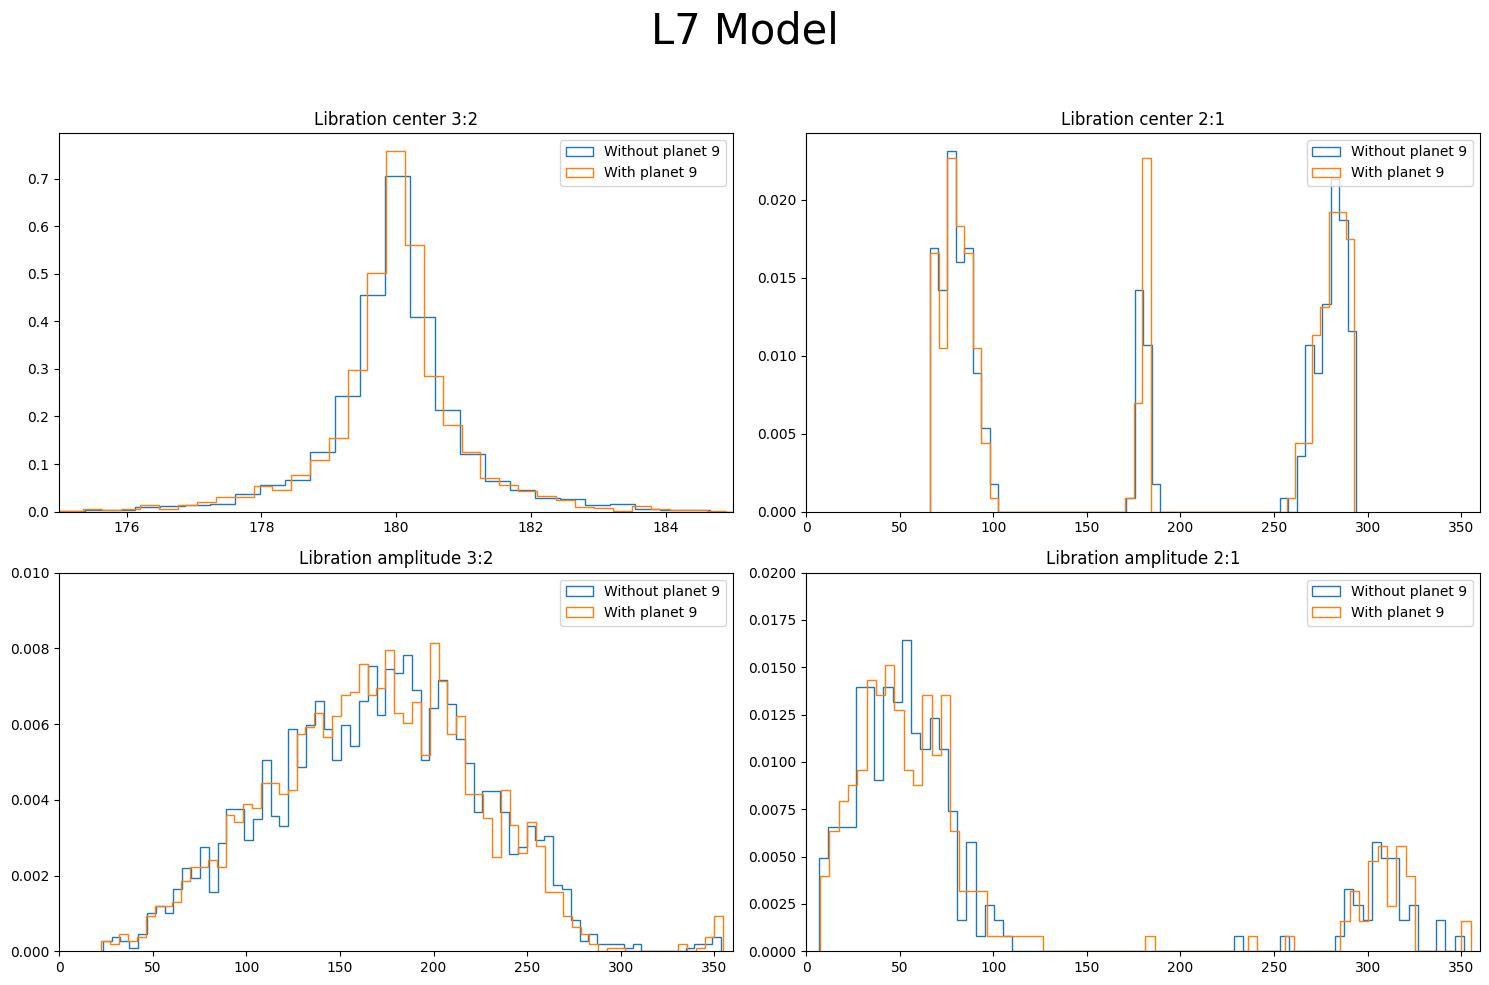

In [198]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

lib_center_32      = np.array([np.median(phi) for phi in data32])
lib_center_21      = np.array([np.median(phi) for phi in data21])
lib_center_32_p9   = np.array([np.median(phi) for phi in data32_p9])
lib_center_21_p9   = np.array([np.median(phi) for phi in data21_p9])

lib_amp_32      = np.array([np.max(phi)-np.min(phi) for phi in data32])
lib_amp_21      = np.array([np.max(phi)-np.min(phi) for phi in data21])
lib_amp_32_p9   = np.array([np.max(phi)-np.min(phi) for phi in data32_p9])
lib_amp_21_p9   = np.array([np.max(phi)-np.min(phi) for phi in data21_p9])

mask32     = (lib_amp_32     < 355) & (medians_std(data32) < 10)
mask21     = (lib_amp_21     < 355) & (medians_std(data21) < 10)
mask32_p9  = (lib_amp_32_p9  < 355) & (medians_std(data32_p9) < 10)
mask21_p9  = (lib_amp_21_p9  < 355) & (medians_std(data21_p9) < 10)

# Libration center plots
ax[0][0].hist(lib_center_32[mask32] ,bins=50,histtype='step'   , label='Without planet 9',density=True);
ax[0][1].hist(lib_center_21[mask21] ,bins=50,histtype='step'   , label='Without planet 9',density=True);

ax[0][0].hist(lib_center_32_p9[mask32_p9] ,bins=50,histtype='step', label='With planet 9',density=True);
ax[0][1].hist(lib_center_21_p9[mask21_p9] ,bins=50,histtype='step', label='With planet 9',density=True);

ax[0][0].legend()
ax[0][1].legend()
ax[0][0].set_title('Libration center 3:2')
ax[0][1].set_title('Libration center 2:1')

# Libration amplitude plots
ax[1][0].hist(lib_amp_32[mask32] ,bins=70,histtype='step'   ,label='Without planet 9',density=True)
ax[1][1].hist(lib_amp_21[mask21] ,bins=70,histtype='step'   ,label='Without planet 9',density=True)

ax[1][0].hist(lib_amp_32_p9[mask32_p9] ,bins=70,histtype='step',label='With planet 9',density=True)
ax[1][1].hist(lib_amp_21_p9[mask21_p9] ,bins=70,histtype='step',label='With planet 9',density=True)

ax[1][0].legend()
ax[1][1].legend()
ax[1][0].set_ylim(0,0.01)
ax[1][1].set_ylim(0,0.02)
ax[1][0].set_title('Libration amplitude 3:2')
ax[1][1].set_title('Libration amplitude 2:1')

ax[0][0].set_xlim(175,185)
ax[0][1].set_xlim(0,360)
ax[1][0].set_xlim(0,360)
ax[1][1].set_xlim(0,360)


fig.suptitle('L7 Model\n',fontsize=30)
fig.tight_layout()

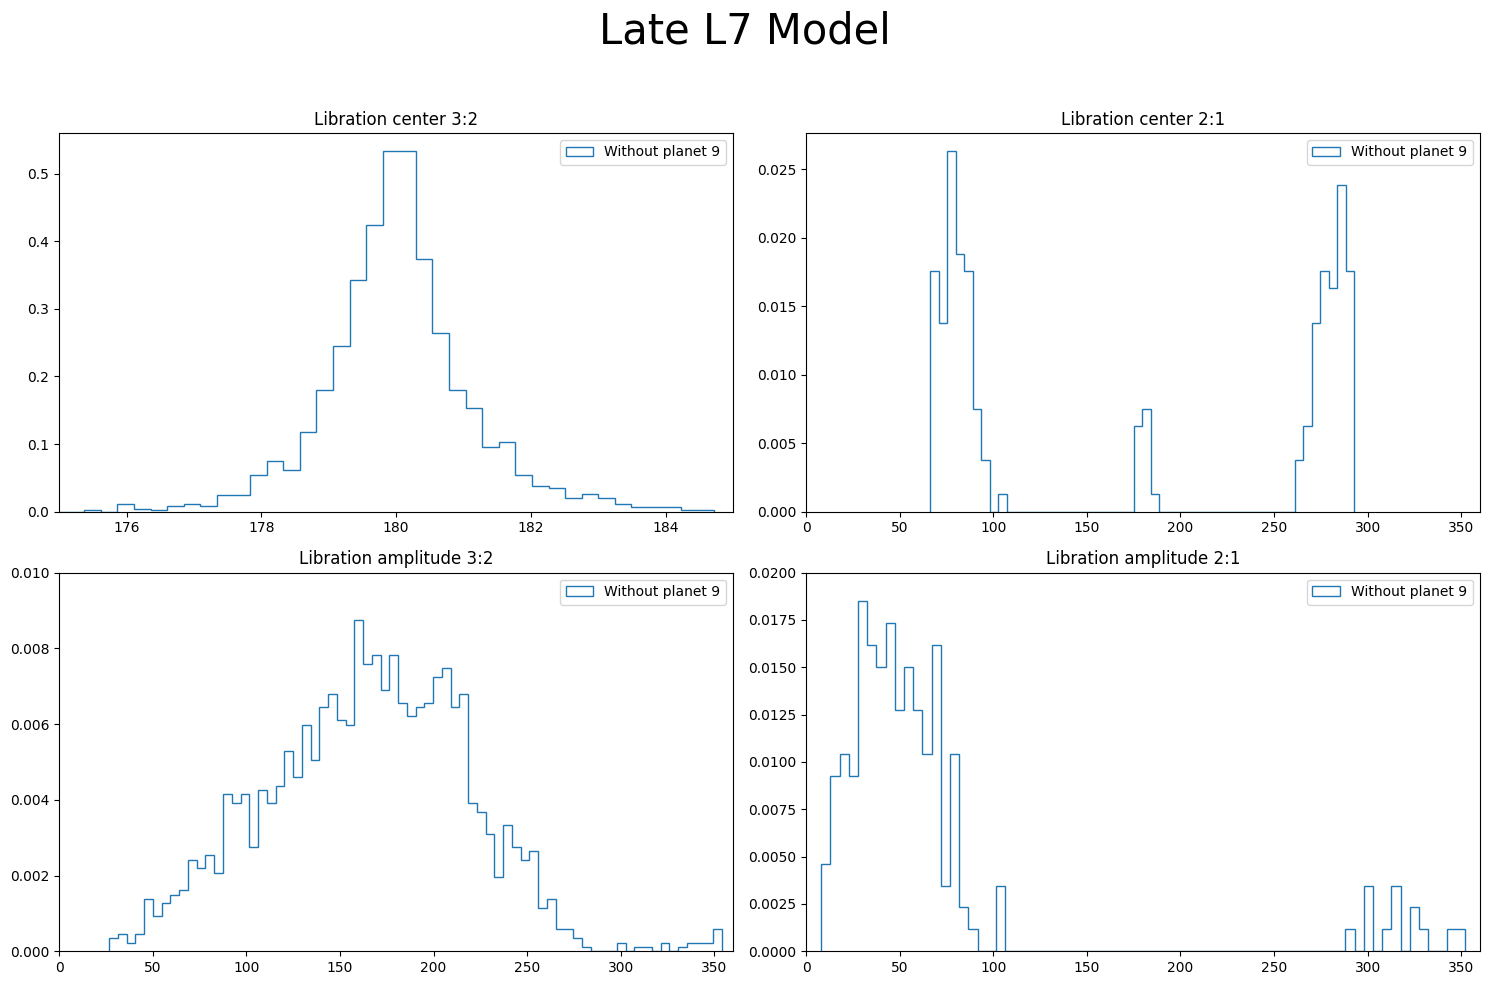

In [199]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

lib_center_32      = np.array([np.median(phi) for phi in data32_4e9])
lib_center_21      = np.array([np.median(phi) for phi in data21_4e9])

lib_amp_32      = np.array([np.max(phi)-np.min(phi) for phi in data32_4e9])
lib_amp_21      = np.array([np.max(phi)-np.min(phi) for phi in data21_4e9])

mask32     = (lib_amp_32     < 355) & (medians_std(data32_4e9) < 10)
mask21     = (lib_amp_21     < 355) & (medians_std(data21_4e9) < 10)

# Libration center plots
ax[0][0].hist(lib_center_32[mask32] ,bins=50,histtype='step'   , label='Without planet 9',density=True);
ax[0][1].hist(lib_center_21[mask21] ,bins=50,histtype='step'   , label='Without planet 9',density=True);

ax[0][0].legend()
ax[0][1].legend()
ax[0][0].set_title('Libration center 3:2')
ax[0][1].set_title('Libration center 2:1')

# Libration amplitude plots
ax[1][0].hist(lib_amp_32[mask32] ,bins=70,histtype='step'   ,label='Without planet 9',density=True)
ax[1][1].hist(lib_amp_21[mask21] ,bins=70,histtype='step'   ,label='Without planet 9',density=True)

ax[1][0].legend()
ax[1][1].legend()
ax[1][0].set_ylim(0,0.01)
ax[1][1].set_ylim(0,0.02)
ax[1][0].set_title('Libration amplitude 3:2')
ax[1][1].set_title('Libration amplitude 2:1')

ax[0][0].set_xlim(175,185)
ax[0][1].set_xlim(0,360)
ax[1][0].set_xlim(0,360)
ax[1][1].set_xlim(0,360)


fig.suptitle('Late L7 Model\n',fontsize=30)
fig.tight_layout()

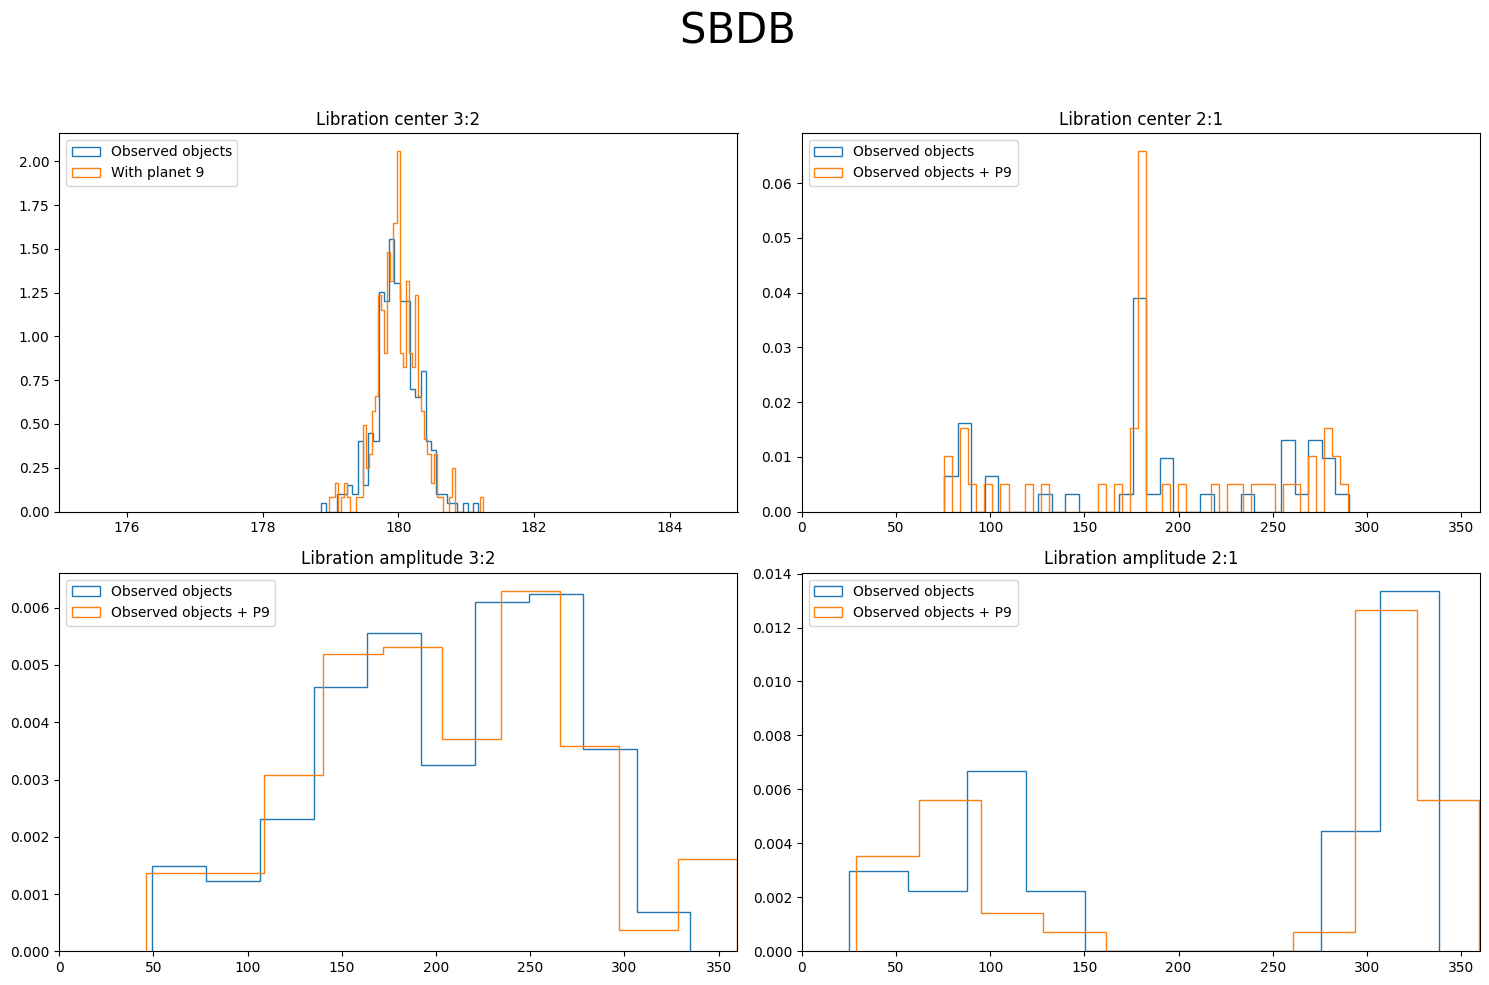

In [200]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

lib_center_32_obs  = np.array([np.median(phi) for phi in data32_obs])
lib_center_21_obs  = np.array([np.median(phi) for phi in data21_obs])
lib_center_32_obs_p9  = np.array([np.median(phi) for phi in data32_obs_p9])
lib_center_21_obs_p9  = np.array([np.median(phi) for phi in data21_obs_p9])

lib_amp_32_obs  = np.array([np.max(phi)-np.min(phi) for phi in data32_obs])
lib_amp_21_obs  = np.array([np.max(phi)-np.min(phi) for phi in data21_obs])
lib_amp_32_obs_p9  = np.array([np.max(phi)-np.min(phi) for phi in data32_obs_p9])
lib_amp_21_obs_p9  = np.array([np.max(phi)-np.min(phi) for phi in data21_obs_p9])

mask32_obs    = (lib_amp_32_obs < 355) #& (medians_std(data32_obs) < 10)
mask21_obs    = (lib_amp_21_obs < 355) #& (medians_std(data21_obs) < 10)
mask32_obs_p9 = (lib_amp_32_obs_p9 < 355) #& (medians_std(data32_obs_p9) < 10)
mask21_obs_p9 = (lib_amp_21_obs_p9 < 355)# #& (medians_std(data21_obs_p9) < 10)

# Libration center plots
ax[0][0].hist(lib_center_32_obs[mask32_obs] ,bins=30,histtype='step', label='Observed objects',density=True);
ax[0][1].hist(lib_center_21_obs[mask21_obs] ,bins=30,histtype='step', label='Observed objects',density=True);
ax[0][0].hist(lib_center_32_obs_p9[mask32_obs_p9] ,bins=50,histtype='step', label='With planet 9',density=True);
ax[0][1].hist(lib_center_21_obs_p9[mask21_obs_p9] ,bins=50,histtype='step', label='Observed objects + P9',density=True);

ax[0][0].legend(loc='upper left')
ax[0][1].legend(loc='upper left')
ax[0][0].set_title('Libration center 3:2')
ax[0][1].set_title('Libration center 2:1')

# Libration amplitude plots
ax[1][0].hist(lib_amp_32_obs[mask32_obs] ,bins=10,histtype='step',label='Observed objects',density=True)
ax[1][1].hist(lib_amp_21_obs[mask21_obs] ,bins=10,histtype='step',label='Observed objects',density=True)
ax[1][0].hist(lib_amp_32_obs_p9[mask32_obs] ,bins=10,histtype='step',label='Observed objects + P9',density=True)
ax[1][1].hist(lib_amp_21_obs_p9[mask21_obs] ,bins=10,histtype='step',label='Observed objects + P9',density=True)

ax[1][0].legend(loc='upper left')
ax[1][1].legend(loc='upper left')
ax[1][0].set_title('Libration amplitude 3:2')
ax[1][1].set_title('Libration amplitude 2:1')

ax[0][0].set_xlim(175,185)
ax[0][1].set_xlim(0,360)
ax[1][0].set_xlim(0,360)
ax[1][1].set_xlim(0,360)


fig.suptitle('SBDB \n',fontsize=30)
fig.tight_layout()

# Libration to circulation on $10^7 yr$

In [164]:
print(list(mask21).count(False)/len(mask21)*100)
print(list(mask21_p9).count(False)/len(mask21_p9)*100)
print(list(mask21_obs).count(False)/len(mask21_obs)*100)
print(list(mask21_obs_p9).count(False)/len(mask21_obs_p9)*100)

print(list(mask32).count(False)/len(mask32)*100)
print(list(mask32_p9).count(False)/len(mask32_p9)*100)
print(list(mask32_obs).count(False)/len(mask32_obs)*100)
print(list(mask32_obs_p9).count(False)/len(mask32_obs_p9)*100)


# print(lib_to_circ32,lib_to_circ21) indices of non librating objects

71.64179104477611
70.95292766934558
69.06474820143885
66.90647482014388
30.95808383233533
31.766467065868266
52.74725274725275
51.098901098901095


|     | Without planet 9 | With planet 9 | 
| --- | --- | --- |
| 3:2 | 12.8% - 52.7% | 10.6% - 51.0% |
| 2:1 | 25.3% - 69.0% | 22.6% - 66.9%|

# Leak rate

In [229]:
#Functions
# returns amplitude on intervals
def interval_amp(ydata,n):
    med_list = []
    for i in range(n):
        segment_length = int(10000/n)
        med_list.append(np.max(ydata[i*segment_length:(i+1)*segment_length])-np.min(ydata[i*segment_length:(i+1)*segment_length]))
    return np.array(med_list)

# returns moment in time when the interval amplitude exceeds 355º
def scape_index(data,n=10):
    amplitudes = interval_amp(data,n)
    if any(amplitudes>355):# and amplitudes[0]<355:
        index  = next(i for i,amp in enumerate(amplitudes) if amp > 355)
        #return np.linspace(0,1e9,n)[index]
        return index
    else: return np.nan

def scape_counts(data,n=10):
    counts = []
    for i in range(n):
        counts.append([scape_index(dat,n) for dat in data].count(i))
    return counts

def resonant_count(data,n=10):
    resonant_asteroid_count = []
    lc = scape_counts(data,n)
    N=len(data)
    for i in range(n):
        N -= lc[i]
        resonant_asteroid_count.append(N)
    return np.array(resonant_asteroid_count)

def fit(data,time,n=10,extend=1,name=None):
    #x = np.linspace(0,1e9,n)
    x = np.linspace(0,time,n)
    y = resonant_count(data,n)

    #popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, x, y, p0=[2900,-0.3e-9,0])
    popt, pcov = curve_fit(lambda t, a, b: a * np.exp(b * t), x, y, p0=[3000, -1.7607605421880312e-09])

    a = popt[0]
    b = popt[1]
    #c = popt[2]
    print(name,a,b)#,c)
    x_fitted = np.linspace(np.min(x), extend*np.max(x), 1000)
    y_fitted = a * np.exp(b * x_fitted) 

    tau='{:.2e}'.format(-1/b)

    return (x_fitted,y_fitted,tau)


def fitc(data,time,n=10,extend=1,params=[2900,-1e-9,100],name=None):
    #x = np.linspace(0,1e9,n)
    x = np.linspace(0,time,n)
    y = resonant_count(data,n)

    popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, x, y, p0=params)
    #popt, pcov = curve_fit(lambda t, a, b: a * np.exp(b * t), x, y, p0=[3000, -1.7607605421880312e-09])

    a = popt[0]
    b = popt[1]
    c = popt[2]
    print(name, a,b,c)
    x_fitted = np.linspace(np.min(x), extend*np.max(x), 1000)
    y_fitted = a * np.exp(b * x_fitted) + c

    tau='{:.2e}'.format(-1/b)

    return (x_fitted,y_fitted,tau)


data32_4e9 2513.888814204445 -8.259230294137841e-11
data21_4e9 521.6951140392292 -2.682087225484623e-10
data32_p9 2811.1113448158685 -2.1418805787113593e-10
data21_p9 610.2030921157668 -6.266795940237519e-10
data_32_obs_4e9 236.2162930650777 -4.273164451053626e-10
data_21_obs_4e9 22.484301153456133 -1.0003292106272866e-09
data32_obs_p9 390.20421218796434 -3.817605115435961e-10
data21_obs_p9 66.68752367603994 -3.706098600600041e-10


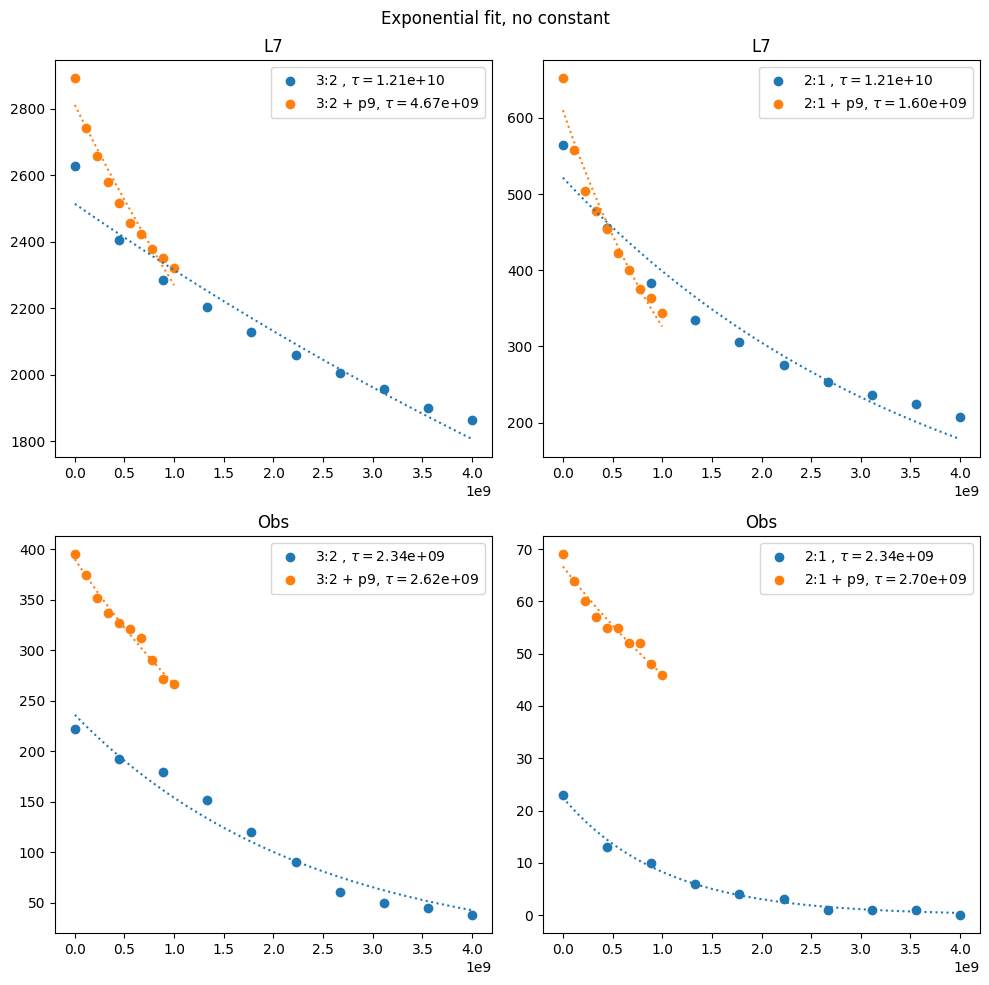

In [242]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
n = 10

# L7 data
fit32_4e9    = fit(data32_4e9,4e9,10,extend=1,name='data32_4e9')
fit21_4e9    = fit(data21_4e9,4e9,10,extend=1,name='data21_4e9')
fit32_p9 = fit(data32_p9,1e9,10,extend=1,name='data32_p9')
fit21_p9 = fit(data21_p9,1e9,10,extend=1,name='data21_p9')

ax[0][0].plot(fit32_4e9   [0],fit32_4e9   [1],linestyle='dotted')
ax[0][0].plot(fit32_p9[0],fit32_p9[1],linestyle='dotted')
ax[0][1].plot(fit21_4e9[0],fit21_4e9[1],linestyle='dotted')
ax[0][1].plot(fit21_p9[0],fit21_p9[1],linestyle='dotted')

ax[0][0].scatter(np.linspace(0,4e9,n),resonant_count(data32_4e9,n),marker='o',label = rf'3:2 , $\tau =${fit32_4e9[2]}')
ax[0][1].scatter(np.linspace(0,4e9,n),resonant_count(data21_4e9,n),marker='o',label = rf'2:1 , $\tau =${fit32_4e9[2]}')
ax[0][0].scatter(np.linspace(0,1e9,n),resonant_count(data32_p9,n),marker='o',label = rf'3:2 + p9, $\tau =${fit32_p9[2]}')
ax[0][1].scatter(np.linspace(0,1e9,n),resonant_count(data21_p9,n),marker='o',label = rf'2:1 + p9, $\tau =${fit21_p9[2]}')

# Obs data
fit32_obs    = fit(data_32_obs_4e9,4e9,10,extend=1,name='data_32_obs_4e9')
fit21_obs    = fit(data_21_obs_4e9,4e9,10,extend=1,name='data_21_obs_4e9')
fit32_obs_p9 = fit(data32_obs_p9,1e9,10,extend=1,name='data32_obs_p9')
fit21_obs_p9 = fit(data21_obs_p9,1e9,10,extend=1,name='data21_obs_p9')

ax[1][0].plot(fit32_obs   [0],fit32_obs   [1],linestyle='dotted')
ax[1][0].plot(fit32_obs_p9[0],fit32_obs_p9[1],linestyle='dotted')
ax[1][1].plot(fit21_obs[0],fit21_obs[1],linestyle='dotted')
ax[1][1].plot(fit21_obs_p9[0],fit21_obs_p9[1],linestyle='dotted')

ax[1][0].scatter(np.linspace(0,4e9,n),resonant_count(data_32_obs_4e9,n),marker='o',label = rf'3:2 , $\tau =${fit32_obs[2]}')
ax[1][1].scatter(np.linspace(0,4e9,n),resonant_count(data_21_obs_4e9,n),marker='o',label = rf'2:1 , $\tau =${fit32_obs[2]}')
ax[1][0].scatter(np.linspace(0,1e9,n),resonant_count(data32_obs_p9,n),marker='o',label = rf'3:2 + p9, $\tau =${fit32_obs_p9[2]}')
ax[1][1].scatter(np.linspace(0,1e9,n),resonant_count(data21_obs_p9,n),marker='o',label = rf'2:1 + p9, $\tau =${fit21_obs_p9[2]}')

ax[0][0].set_title('L7')
ax[0][1].set_title('L7')
ax[1][0].set_title('Obs')
ax[1][1].set_title('Obs')

for axi in (ax[0][0],ax[0][1],ax[1][0],ax[1][1]):
    axi.legend()
fig.suptitle('Exponential fit, no constant');
fig.tight_layout()

data32_4e9 838.5603884526513 -4.899744138621662e-10 1763.2321432796375
data21_4e9 366.1402551879148 -7.014531116261629e-10 193.75017330976647
data32_p9 655.4380547392236 -1.873872091911569e-09 2226.3656888478918
data21_p9 327.41117695354416 -2.074674226342915e-09 312.1307397099571
data_32_obs_4e9 345.7685890437545 -2.164592143673474e-10 -117.82954269835665
data_21_obs_4e9 22.452565737588372 -1.007007764021845e-09 0.04807476424081768
data32_obs_p9 329.5854912775211 -4.708943755199609e-10 61.40492940956068
data21_obs_p9 28.38872626568556 -1.310492680832321e-09 39.73416008156608


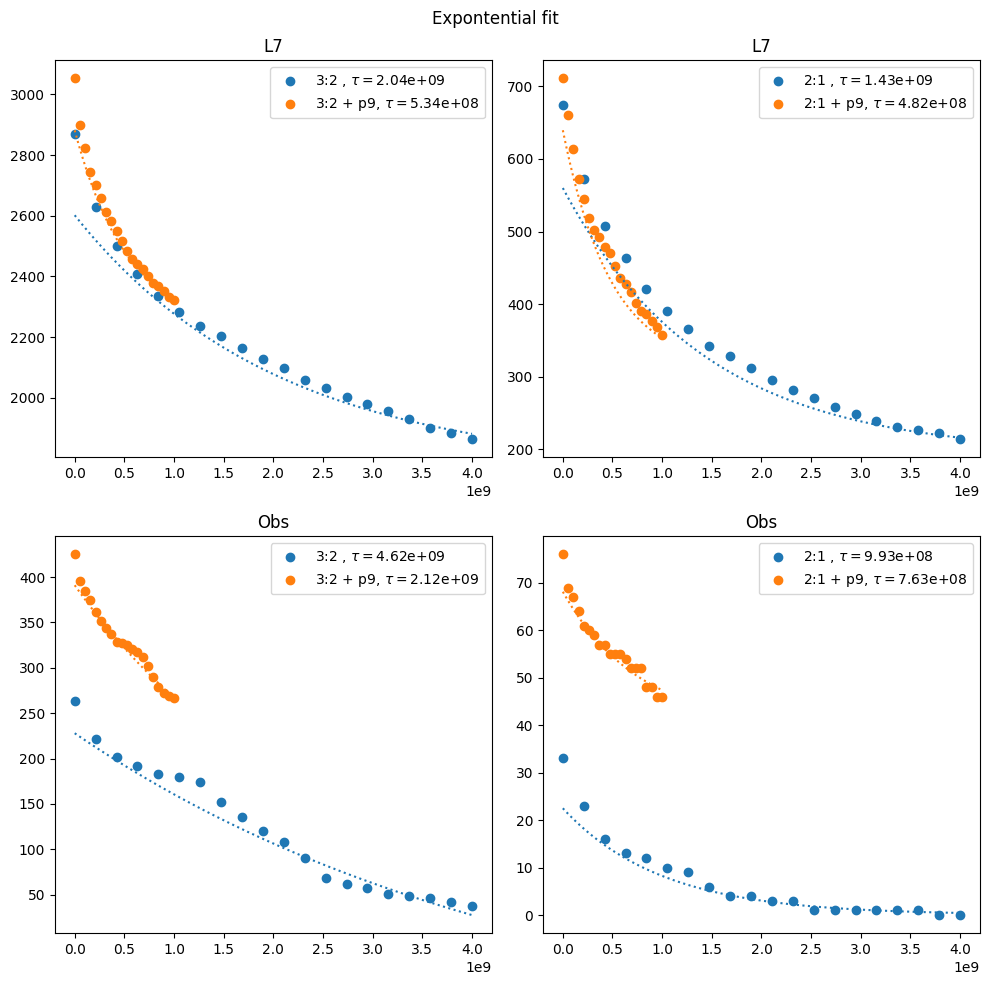

In [247]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
n = 20

# L7 data
fit32_4e9    = fitc(data32_4e9,4e9,10,extend=1,name='data32_4e9')
fit21_4e9    = fitc(data21_4e9,4e9,10,extend=1,name='data21_4e9')
fit32_p9 = fitc(data32_p9,1e9,10,extend=1,name='data32_p9')
fit21_p9 = fitc(data21_p9,1e9,10,extend=1,name='data21_p9')

ax[0][0].plot(fit32_4e9   [0],fit32_4e9   [1],linestyle='dotted')
ax[0][0].plot(fit32_p9[0],fit32_p9[1],linestyle='dotted')
ax[0][1].plot(fit21_4e9[0],fit21_4e9[1],linestyle='dotted')
ax[0][1].plot(fit21_p9[0],fit21_p9[1],linestyle='dotted')

ax[0][0].scatter(np.linspace(0,4e9,n),resonant_count(data32_4e9,n),marker='o',label = rf'3:2 , $\tau =${fit32_4e9[2]}')
ax[0][1].scatter(np.linspace(0,4e9,n),resonant_count(data21_4e9,n),marker='o',label = rf'2:1 , $\tau =${fit21_4e9[2]}')
ax[0][0].scatter(np.linspace(0,1e9,n),resonant_count(data32_p9,n),marker='o',label = rf'3:2 + p9, $\tau =${fit32_p9[2]}')
ax[0][1].scatter(np.linspace(0,1e9,n),resonant_count(data21_p9,n),marker='o',label = rf'2:1 + p9, $\tau =${fit21_p9[2]}')

# Obs data
fit32_obs    = fitc(data_32_obs_4e9,4e9,10,extend=1,name='data_32_obs_4e9')
fit21_obs    = fitc(data_21_obs_4e9,4e9,10,extend=1,name='data_21_obs_4e9')
fit32_obs_p9 = fitc(data32_obs_p9,1e9,10,extend=1,name='data32_obs_p9')
fit21_obs_p9 = fitc(data21_obs_p9,1e9,10,extend=1,params=[300,-1e-9,100],name='data21_obs_p9')

ax[1][0].plot(fit32_obs   [0],fit32_obs   [1],linestyle='dotted')
ax[1][0].plot(fit32_obs_p9[0],fit32_obs_p9[1],linestyle='dotted')
ax[1][1].plot(fit21_obs[0],fit21_obs[1],linestyle='dotted')
ax[1][1].plot(fit21_obs_p9[0],fit21_obs_p9[1],linestyle='dotted')

ax[1][0].scatter(np.linspace(0,4e9,n),resonant_count(data_32_obs_4e9,n),marker='o',label = rf'3:2 , $\tau =${fit32_obs[2]}')
#ax[1][0].scatter(np.linspace(0,1e9,n),resonant_count(data32_obs,n),marker='o',label = rf'3:2 , $\tau =${fit32_obs[2]}',color='green')##########
ax[1][1].scatter(np.linspace(0,4e9,n),resonant_count(data_21_obs_4e9,n),marker='o',label = rf'2:1 , $\tau =${fit21_obs[2]}')
ax[1][0].scatter(np.linspace(0,1e9,n),resonant_count(data32_obs_p9,n),marker='o',label = rf'3:2 + p9, $\tau =${fit32_obs_p9[2]}')
ax[1][1].scatter(np.linspace(0,1e9,n),resonant_count(data21_obs_p9,n),marker='o',label = rf'2:1 + p9, $\tau =${fit21_obs_p9[2]}')

ax[0][0].set_title('L7')
ax[0][1].set_title('L7')
ax[1][0].set_title('Obs')
ax[1][1].set_title('Obs')

for axi in (ax[0][0],ax[0][1],ax[1][0],ax[1][1]):
    axi.legend()
fig.suptitle('Expontential fit')
fig.tight_layout()


Note: small, consistent fall at ~1.45e9 yr and 2.45e9 yr

# Obs 4e9 a,e,i

In [122]:
ewe = []
for i in range(1,72):
    ewe.append(np.load(f'Results/MPC_32_4e9_0opps/a_list/a_list_32_{i}.npy'))
a_obs_32 = np.concatenate(tuple(ewe))

ewe = []
for i in range(1,72):
    ewe.append(np.load(f'Results/MPC_32_4e9_0opps/inc_list/inc_list_32_{i}.npy'))
inc_obs_32 = np.concatenate(tuple(ewe))

ewe = []
for i in range(1,72):
    ewe.append(np.load(f'Results/MPC_32_4e9_0opps/e_list/e_list_32_{i}.npy'))
e_obs_32 = np.concatenate(tuple(ewe))

(38.5, 40.5)

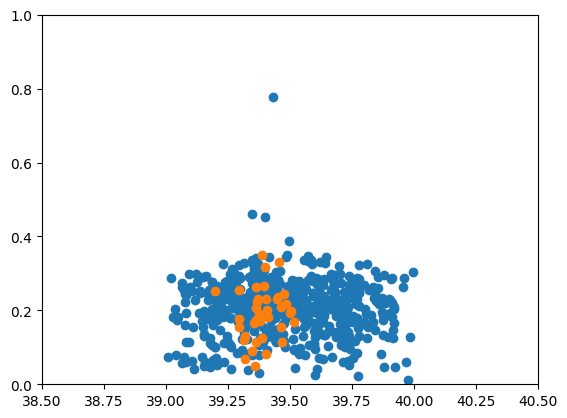

In [152]:
plt.scatter(a_obs_32[:,0],e_obs_32[:,0])
plt.scatter(a_obs_32[:,-1],e_obs_32[:,-1])
plt.ylim(0,1)
plt.xlim(38.5,40.5)

(38.0, 41.0)

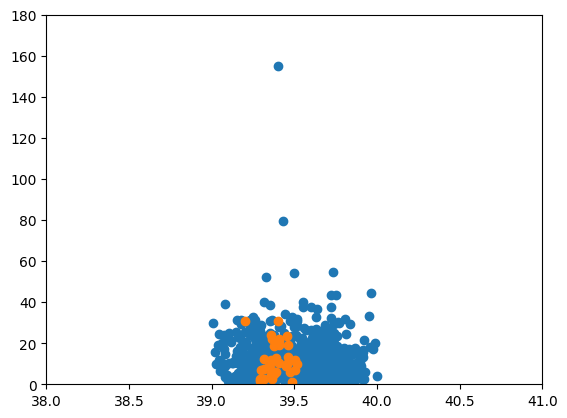

In [150]:
plt.scatter(a_obs_32[:,0],inc_obs_32[:,0])
plt.scatter(a_obs_32[:,-1],inc_obs_32[:,-1])
plt.ylim(0,180)
plt.xlim(38,41)

(0.0, 1.0)

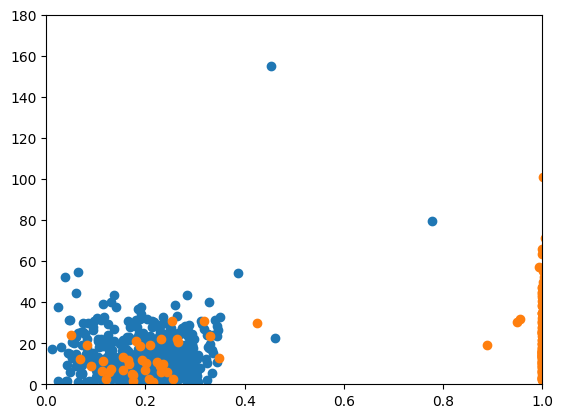

In [144]:
plt.scatter(e_obs_32[:,0],inc_obs_32[:,0])
plt.scatter(e_obs_32[:,-1],inc_obs_32[:,-1])
plt.ylim(0,180)
plt.xlim(0,1)

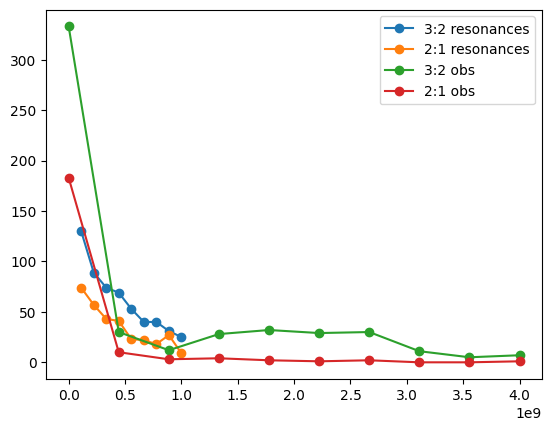

In [113]:
n = 10
plt.plot(np.linspace(0,1e9,n)[1:],scape_counts(data32,n)[1:],marker='o',label = '3:2 resonances')
plt.plot(np.linspace(0,1e9,n)[1:],scape_counts(data21,n)[1:],marker='o',label = '2:1 resonances')
#plt.plot(np.linspace(0,1e9,n)[1:],scape_counts(data32_p9,n)[1:],marker='o',label = '3:2 resonances + planet 9')
#plt.plot(np.linspace(0,1e9,n)[1:],scape_counts(data21_p9,n)[1:],marker='o',label = '2:1 resonances + planet 9')
plt.plot(np.linspace(0,4e9,n),scape_counts(data_32_obs_4e9,n),marker='o',label = '3:2 obs')
plt.plot(np.linspace(0,4e9,n),scape_counts(data_21_obs_4e9,n),marker='o',label = '2:1 obs')
plt.legend()

# Eficiencia del cluster

time_test.py (4 planetas gigantes, dt=0.25, n_out=10000, solo la integración sin almacenar memoria):

Notebook: 25.546s

Cluster:  46.856s